# Maximum Likelihood Estimate

Suppose we are given a problem where we can assume the _parametric class_ of distribution (e.g. Normal Distribution) that generates a set of data. Since this class of distribution has a finite number of parameters that need to be figured out (mean $\mu$ and standard deviation $\sigma$ in case of normal distribution) in order to identify the particular member of the class, we will use the given data to do so.

The obtained parameter estimates will be called **Maximum Likelihood Estimates**.

Let us consider a Ransom Variable $X$ to be normally distributed with some mena $\mu$ and standard deviation $\sigma$. We need to estimate $\mu$ and $\sigma$ using our samples which accurately represent the actual $X$ and not just the samples that we have drawn out.

## Estimating Parameters

Let's have a look at the Probability Density Function (PDF) for the Normal Distribution and see what they mean.

$$
\begin{equation}
p(x; \mu, \sigma) = \frac{e^{-(x - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}
\end{equation}
$$ (eq_normal_dist)

This equation is used to obtain the probability of our sample $x$ being from our random variable $X$, when the true parameters of the distribution are $\mu$ and $\sigma$. Normal distributions with different $\mu$ and $\sigma$ are shown below.

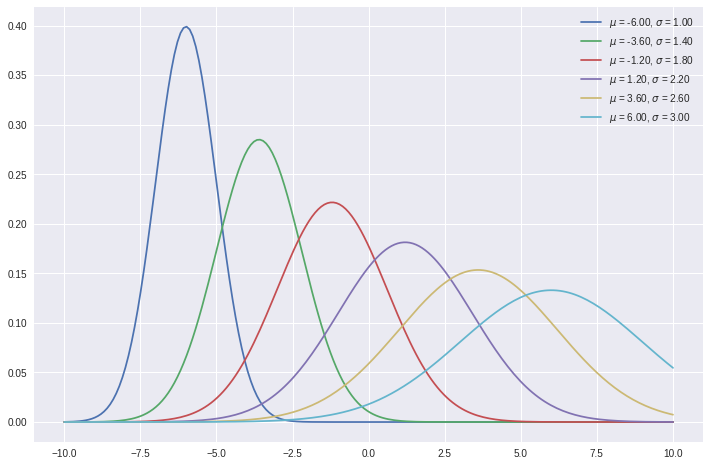

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(10)

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 8)

def plot_normal(x_range, mu=0, sigma=1, **kwargs):
    '''
    https://emredjan.github.io/blog/2017/07/19/plotting-distributions/
    '''
    x = x_range
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    
mus = np.linspace(-6, 6, 6)
sigmas = np.linspace(1, 3, 6)

assert len(mus) == len(sigmas)
x_range = np.linspace(-10, 10, 200)

for mu, sigma in zip(mus, sigmas):
    plot_normal(x_range, mu, sigma, label=f'$\mu$ = {mu:.2f}, $\sigma$ = {sigma:.2f}')
plt.legend();

Let us consider that our sample = 5. Then what is the probability that it comes from a normal distribution with $\mu = 4$ and $\sigma = 1$? To get this probability, we only need to plug in the values of $x, \mu$ and $\sigma$ in Equation {eq}`eq_normal_dist`. Scipy as a handy function [`norm.pdf()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) that we can use to obtain this easily.

In [2]:
from scipy.stats import norm

norm.pdf(5, 4, 1)

0.24197072451914337

What if our sample came from a different distribution with $\mu = 3$ and $\sigma = 2$?

In [3]:
norm.pdf(5, 3, 2)

0.12098536225957168

As we can see, the PDF equation {eq}`eq_normal_dist` shows us how likely our sample are from a distribution with certain parameters. Current results show that our sample is more likely to have come from the first distribution. But this with just a single sample. What if we had multiple samples and we wanted to estimate the parameters?

Let us assume we have multiple samples from $X$ which we assume to have come from some normal distribution. Also, all the samples are mutually independent of one another. In this case, the we can get the total probability of observing all samples by multiplying the probabilities of observing each sample individually.

E.g., The probability that both $7$ and $1$ are drawn from a normal distribution with $\mu = 4$ and $\sigma=2$ is equal to:

In [4]:
norm.pdf(7, 4, 2) * norm.pdf(1, 4, 2)

0.004193701896768355

## Likelihood of many samples


In [5]:
x_data = np.random.randint(-9, high=9, size=5)
print(x_data)

[ 0 -5  6 -9  8]


Let us now consider 5 samples with values 0, -5,  6, -9 and 8. We want to know the normal distribution from which all of these samples were most likely to be drawn. In other words, we would like to find the value of p(0, -5,  6, -9, 8) as given in Equation {eq}`eq_normal_dist`. Since we do not know the values of $\mu$ and $\sigma$ for the required distribution, we need to estimate them.

This is done using maximum likelihood estimation (MLE). Here, we specify a distribution of unknown parameters and then use our data to obtain the actual parameter values. In this process, we multiple the individual probabilities 

## References

https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030